<a href="https://colab.research.google.com/github/aneekbsws/deeplearning/blob/main/improving_nn_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization#

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import math

Basic activation functions

In [309]:
def sigmoid(z):
  S = 1/(1+np.exp(-z))
  return S

def relu(z):
  S = np.maximum(0,z)
  return S

Forward Propagation

In [310]:
def forward_propagation(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]  
  W3 = parameters["W3"]
  b3 = parameters["b3"] 
  Z1 = np.dot(W1,X) + b1
  a1 = relu(Z1)
  Z2 = np.dot(W2,a1)+b2
  a2 = relu(Z2)
  Z3 = np.dot(W3, a2) + b3
  a3 = sigmoid(Z3)
  cache = (Z1, a1, W1, b1, Z2, a2, W2, b2, Z3, a3, W3, b3)
  return a3, cache

Backward Propagation

In [311]:
def backward_propagation(X, Y, cache):
  m = X.shape[1]
  (Z1, a1, W1, b1, Z2, a2, W2, b2, Z3, a3, W3, b3) = cache
  dz3 = 1./m*(a3-Y)
  dW3 = np.dot(dz3, a2.T)
  db3 = np.sum(dz3, axis=1, keepdims =True)

  da2 = np.dot(W3.T, dz3)
  dz2 = np.multiply(da2, np.int64(a2>0))
  dW2 = np.dot(dz2, a1.T)
  db2 = np.sum(dz2, axis=1, keepdims=True)
  
  da1 = np.dot(W2.T, dz2)
  dz1 = np.multiply(da1, np.int64(a1>0))
  dW1 = np.dot(dz1, X.T)
  db1 = np.sum(dz1, axis=1, keepdims=True)
  
  gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
  return gradients

Update Parameters

In [312]:
def update_params(parameters, grads, lr):
  L = len(parameters)//2
  
  for i in range(L):
    # print(parameters["W"+str(i+1)].shape)
    # print(grads["dW"+str(i+1)].shape)
    parameters["W"+str(i+1)] = parameters["W"+str(i+1)] - (lr*grads["dW"+str(i+1)])
    parameters["b"+str(i+1)] = parameters["b"+str(i+1)] - (lr*grads["db"+str(i+1)])  
  return parameters

Computing Cost

In [313]:
def compute_cost(a3, Y):
  m = Y.shape[1]
  inside_sum = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1-a3),(1-Y))
  loss = 1./m* np.nansum(inside_sum)
  return loss

Loading Dataset

In [314]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

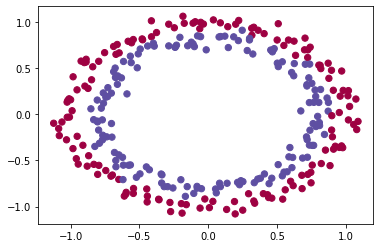

In [315]:
X_train, Y_train, X_test, Y_test = load_dataset()

In [316]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [317]:
def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions

**Zero-Initialization**

In [318]:
def initialize_parameters_zeros(layers_dims):
  parameters = {}
  L = len(layers_dims)
  for l in range(1,L):
    parameters["W"+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
    parameters["b"+str(l)] = np.zeros((layers_dims[l], 1))
  return parameters

In [319]:
def initialization_parameters_random(layers_dims):
  parameters = {}
  L = len(layers_dims)
  for l in range(1,L):
    parameters["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
    parameters["b"+str(l)] = np.zeros((layers_dims[l], 1))
  return parameters

In [320]:
def initialization_parameters_he(layers_dims):
  parameters = {}
  L = len(layers_dims)
  for l in range(1,L):
    parameters["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*math.sqrt(2/layers_dims[l-1])
    parameters["b"+str(l)] = np.zeros((layers_dims[l], 1))  
  return parameters

In [321]:
def initialization_parameters_xavier(layers_dims):
  parameters = {}
  L = len(layers_dims)
  for l in range(1,L):
    parameters["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*math.sqrt(1/layers_dims[l-1])
    parameters["b"+str(l)] = np.zeros((layers_dims[l], 1))  
  return parameters

Final model with different forms of initializations

In [322]:
def model(X, Y, lr = 0.01, num_itr = 1500, print_cost = True, init='he'):
  m = Y.shape[1]
  grads = {}
  costs = []
  layers_dims = [X.shape[0],10,5,1]
  if init == 'zero':
    parameters = initialize_parameters_zeros(layers_dims)
  elif init=='random':
    parameters = initialization_parameters_random(layers_dims)
  elif init == 'he':
    parameters = initialization_parameters_he(layers_dims)
  elif init == 'xavier':
    parameters = initialization_parameters_xavier(layers_dims)
  for i in range(num_itr):
    a3, cache = forward_propagation(X, parameters)
    grads = backward_propagation(X, Y, cache)
    parameters = update_params(parameters, grads, lr)
    cost = compute_cost(a3, Y)
    if print_cost and i%1000 == 0:
      print("Cost after iteration {} : {}".format(i,cost))
      costs.append(cost)
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(lr) + ' for initialization type = ' + init)
  plt.show()
  return parameters

In [323]:
def predict(X,Y,parameters):
  m = X.shape[1]
  p = np.zeros((1,m), dtype = np.int)
  a3, caches = forward_propagation(X, parameters)
  for i in range(0, a3.shape[1]):
    if(a3[0,i]>0.5):
      p[0,i] = 1
    else:
      p[0,i] = 0
  print("Accuracy : ",str(np.sum((p==Y)/m)))
  return p

Performing with zero initialization

Cost after iteration 0 : 0.6931471805599453
Cost after iteration 1000 : 0.6931471805599453
Cost after iteration 2000 : 0.6931471805599453
Cost after iteration 3000 : 0.6931471805599453
Cost after iteration 4000 : 0.6931471805599453
Cost after iteration 5000 : 0.6931471805599453
Cost after iteration 6000 : 0.6931471805599453
Cost after iteration 7000 : 0.6931471805599453
Cost after iteration 8000 : 0.6931471805599453
Cost after iteration 9000 : 0.6931471805599453
Cost after iteration 10000 : 0.6931471805599455
Cost after iteration 11000 : 0.6931471805599453
Cost after iteration 12000 : 0.6931471805599453
Cost after iteration 13000 : 0.6931471805599453
Cost after iteration 14000 : 0.6931471805599453


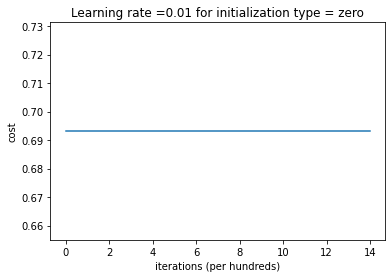

On training set : 
Accuracy :  0.49999999999999994
On test set : 
Accuracy :  0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [324]:
parameters = model(X_train, Y_train, lr = 0.01, num_itr = 15000, print_cost = True, init = 'zero')
print("On training set : ")
Y_pred_train = predict(X_train, Y_train, parameters)
print("On test set : ")
Y_pred_test = predict(X_test, Y_test, parameters)

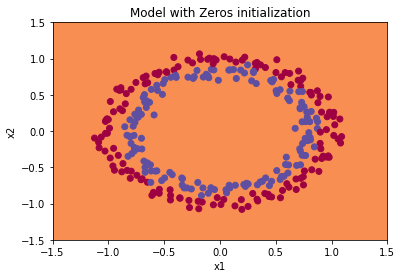

In [325]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), X_train, Y_train)

Doing the same test now with random initialization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Cost after iteration 0 : inf
Cost after iteration 1000 : 0.3860732322807991
Cost after iteration 2000 : 0.2758805093976621
Cost after iteration 3000 : 0.2677109164510648
Cost after iteration 4000 : 0.2613557357108068
Cost after iteration 5000 : 0.25428280235264455
Cost after iteration 6000 : 0.2494460623887044
Cost after iteration 7000 : 0.24285282290810548
Cost after iteration 8000 : 0.2203416424409692
Cost after iteration 9000 : 0.2172382295050108
Cost after iteration 10000 : 0.21485734949382637
Cost after iteration 11000 : 0.2127765576398346
Cost after iteration 12000 : 0.21091296950558236
Cost after iteration 13000 : 0.20930184350794936
Cost after iteration 14000 : 0.2078966737244453


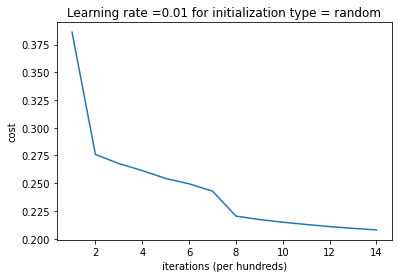

On training set : 
Accuracy :  0.8833333333333333
On test set : 
Accuracy :  0.85


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [326]:
parameters = model(X_train, Y_train, lr = 0.01, num_itr = 15000, print_cost = True, init = 'random')
print("On training set : ")
Y_pred_train = predict(X_train, Y_train, parameters)
print("On test set : ")
Y_pred_test = predict(X_test, Y_test, parameters)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


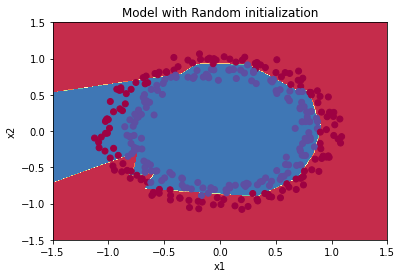

In [327]:
plt.title("Model with Random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), X_train, Y_train)

Doing the same with Xavier Initialziation

Cost after iteration 0 : 0.699474799745086
Cost after iteration 1000 : 0.6885221409227142
Cost after iteration 2000 : 0.680745775970947
Cost after iteration 3000 : 0.6741628549186806
Cost after iteration 4000 : 0.6660219592539256
Cost after iteration 5000 : 0.6550310685555333
Cost after iteration 6000 : 0.6398583643019139
Cost after iteration 7000 : 0.6145610703007984
Cost after iteration 8000 : 0.5790552322372698
Cost after iteration 9000 : 0.5368739949429943
Cost after iteration 10000 : 0.4835109959965606
Cost after iteration 11000 : 0.38697981601656295
Cost after iteration 12000 : 0.28795439396837597
Cost after iteration 13000 : 0.21333129214676028
Cost after iteration 14000 : 0.16093026559150803


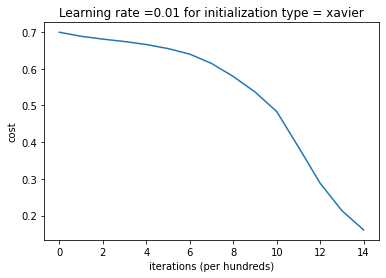

On training set : 
Accuracy :  0.9900000000000002
On test set : 
Accuracy :  0.9299999999999999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [328]:
parameters = model(X_train, Y_train, lr = 0.01, num_itr = 15000, print_cost = True, init = 'xavier')
print("On training set : ")
Y_pred_train = predict(X_train, Y_train, parameters)
print("On test set : ")
Y_pred_test = predict(X_test, Y_test, parameters)

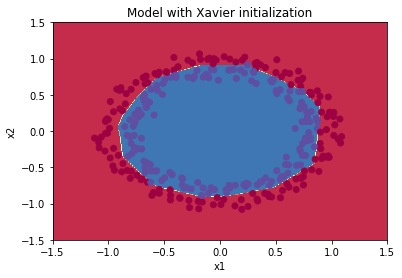

In [329]:
plt.title("Model with Xavier initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), X_train, Y_train)

Doing the same with He initialization

Cost after iteration 0 : 0.7038084914209564
Cost after iteration 1000 : 0.6783833346580105
Cost after iteration 2000 : 0.6677191551455002
Cost after iteration 3000 : 0.6495343216221725
Cost after iteration 4000 : 0.6203553521195897
Cost after iteration 5000 : 0.5716069952608623
Cost after iteration 6000 : 0.5034292581326051
Cost after iteration 7000 : 0.3648302200402191
Cost after iteration 8000 : 0.2809498620196602
Cost after iteration 9000 : 0.18372297485479921
Cost after iteration 10000 : 0.13754558054331525
Cost after iteration 11000 : 0.11287700518627276
Cost after iteration 12000 : 0.09623989766424745
Cost after iteration 13000 : 0.084038315796165
Cost after iteration 14000 : 0.07515999115335109


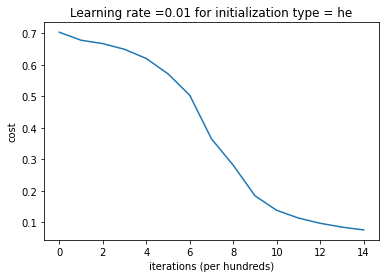

On training set : 
Accuracy :  0.9900000000000002
On test set : 
Accuracy :  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [330]:
parameters = model(X_train, Y_train, lr = 0.01, num_itr = 15000, print_cost = True, init = 'he')
print("On training set : ")
Y_pred_train = predict(X_train, Y_train, parameters)
print("On test set : ")
Y_pred_test = predict(X_test, Y_test, parameters)

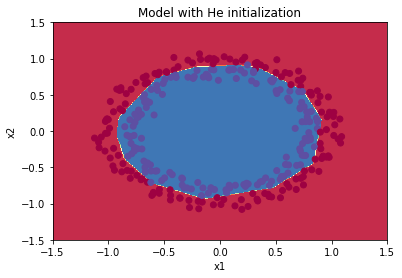

In [331]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), X_train, Y_train)

Summary


*   Zero Initialization - 50% accuracy - fails to do anything
*   Random Initialization - 85% accuracy - explodes due to large randomization
*   Xavier Initialization - 92% accuaracy - much better than random init
*   He initialization - 95% accuracy - perfect



